### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Practical activity: Scraping COVID data

**This is the solution to the activity.**

You work as a data analyst at a health insurance company. To provide up-to-date information for the executive, claims department, and clients, you are tasked with gathering the latest data on worldwide COVID-19 cases. 

Each department requires different information. For each continent on the list:
The executive needs to know:
- Total cases
- Total deaths

Claims needs to know:
- New cases
- New deaths
- Active cases
- Serious, Critical

Clients need to know:
- Total cases
- Total recovered
- Newly recovered

## 1. Import the libraries

In [2]:
# Import the necessary packages.
import requests
import pandas as pd
from bs4 import BeautifulSoup

## 2. Establish connection with URL

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
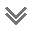

In [3]:
# Create a url variable.
url = 'https://www.worldometers.info/coronavirus/'

# Create a requests variable.
r = requests.get(url)

# Make contact with the website.
if r.status_code == 200:
    html_doc = r.text
    
# Get a BeautifulSoup object.
soup = BeautifulSoup(html_doc)

# Print the output.
print(soup.prettify())

## 3. Extract tabular data

In [4]:
# Extract the contents of the table with the table id. 
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

## 4. Extract table headers

In [ ]:
# Specify BeautifulSoup to go through the table and find everything 
# with a tr tag.
# Note: th = (table header), tr = (table row), and td = table column
rows = table.find_all('tr', attrs={'style': ""})
rows

In [ ]:
# Store the extracted data.
output = []

column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# Create a for loop statement.
for cases in rows:
    cases_data = cases.find_all("td")
    if cases_data:
        # Extract the text within each element.
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
# Create an output.
output

## 5. Convert extracted data into a Panda DataFrame

In [ ]:
# Create a DataFrame directly from the output.
data = pd.DataFrame(output)

# View the DataFrame.
data.head()